# Sentiment Analysis Using Pre_trained Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_csv('Preprocess_Reviews.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiment,neg,neu,pos,compound
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0,positive,0.100,0.592,0.308,0.8966
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,positive,0.155,0.445,0.400,0.8548
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,5,pleased,0.0,positive,0.000,0.000,1.000,0.4404
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,work good go slow sometimes good phone love,0.0,positive,0.000,0.333,0.667,0.8750
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,positive,0.103,0.714,0.183,0.4215


In [5]:
#Drop unnecessary columns:
df = df.drop(['Product Name', 'Price', 'Review Votes', 'Brand Name'], axis=1)
df.dropna(inplace=True)

In [6]:
df_Positive = df[df['sentiment'] == 'positive'][0:20000]
df_Neutral = df[df['sentiment'] == 'neutral']
df_Negative = df[df['sentiment'] == 'negative']

In [7]:
df_Neutral_over = df_Neutral.sample(20000, replace=True)
df_Negative_over = df_Negative.sample(20000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [8]:
df

,Rating,Reviews,sentiment,neg,neu,pos,compound
0,5,feel lucky found used phone u used hard phone ...,positive,0.100,0.592,0.308,0.8966
1,4,nice phone nice grade pantach revue clean set ...,positive,0.155,0.445,0.400,0.8548
2,5,pleased,positive,0.000,0.000,1.000,0.4404
3,4,work good go slow sometimes good phone love,positive,0.000,0.333,0.667,0.8750
4,4,great phone replace lost phone thing volume bu...,positive,0.103,0.714,0.183,0.4215
...,...,...,...,...,...,...,...
169660,1,happy month nothing problem since phone freeze...,negative,0.252,0.395,0.353,0.2635
222157,2,key seem though may give sticky problem long r...,negative,0.130,0.870,0.000,-0.4019
264663,2,software state compatible iphone support also ...,negative,0.230,0.576,0.194,-0.1280
130257,1,hi device isnt working anymore contact uk repa...,negative,0.000,1.000,0.000,0.0000


In [15]:
# Tokenization and padding (example only, adjust based on your actual preprocessing steps)
max_length = 100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Reviews'])
X = tokenizer.texts_to_sequences(df['Reviews'])
X = pad_sequences(X, maxlen=max_length)  # Adjust max_length according to your data


In [17]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

In [18]:
# Convert labels to categorical
y = tf.keras.utils.to_categorical(y, num_classes=3)  # Adjust num_classes according to your number of classes


In [19]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Define model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_length = 100  # Adjust according to your data


In [22]:
# CNN Model construction
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

C:\Users\MK Jutt\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [23]:
# Compile the CNN model
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [27]:
# Model training
epochs = 10
batch_size = 128

In [28]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.9239 - loss: 0.2249 - val_accuracy: 0.8618 - val_loss: 0.3972
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.9501 - loss: 0.1519 - val_accuracy: 0.8649 - val_loss: 0.4628
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9639 - loss: 0.1103 - val_accuracy: 0.8673 - val_loss: 0.5334
Epoch 3: early stopping


In [29]:
# Evaluate model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8665 - loss: 0.5341
Validation Loss: 0.5334
Validation Accuracy: 0.8673


In [31]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

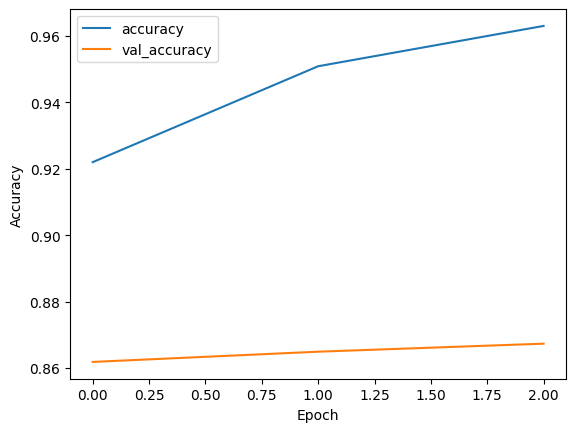

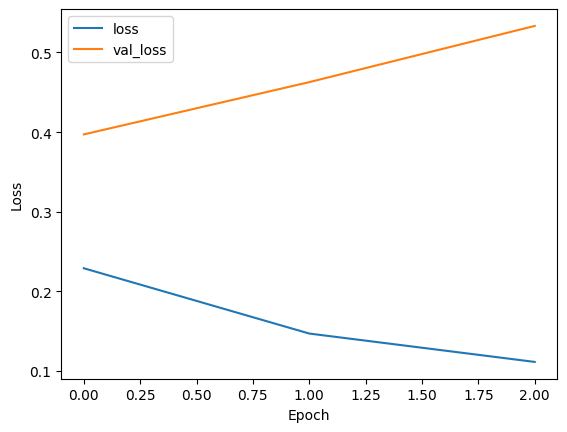

In [32]:
# Plot accuracy and loss
plot_history(history)

In [69]:
# Example of making predictions
new_reviews = ["My phone is not working well. it seems to be a damaged!", "I appreciate that company to providing good product."]
sequences = tokenizer.texts_to_sequences(new_reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_length)
predictions = model.predict(padded_sequences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [70]:
# Decode predictions
predicted_labels = label_encoder.inverse_transform([np.argmax(pred) for pred in predictions])


In [79]:
for review, predicted_label, prediction in zip(new_reviews, predicted_labels, predictions):
    sentiment = predicted_label
    confidence = prediction[np.argmax(prediction)]
    print(f'Review: {review} | Predicted Sentiment: {sentiment} | Confidence: {confidence:.4f}')

Review: My phone is not working well. it seems to be a damaged! | Predicted Sentiment: negative | Confidence: 0.9263
Review: I appreciate that company to providing good product. | Predicted Sentiment: positive | Confidence: 0.8260
